<a href="https://colab.research.google.com/github/sathasivamn/Multiple-Linear-Regression/blob/main/Assignment_6_Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression

## Steps:

## 1. Exploratory Data Analysis (EDA)
## 2. Data Preprocessing (handle categorical variables, missing values, and scaling).
## 3. Train-test split (80% training, 20% testing)
## 4. MLR Model Building
## 5. Model Evaluation
## 6. Applying Lasso & Ridge Regression

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
# Load the dataset
df = pd.read_csv("ToyotaCorolla - MLR.csv")

In [3]:
# Display basic information
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000 

In [4]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


In [5]:
# Display first few rows
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


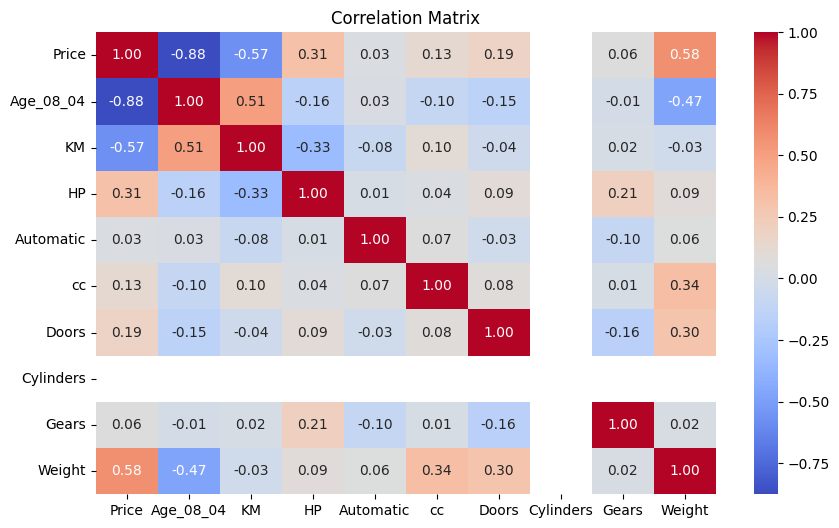

In [7]:
# Exploratory Data Analysis (EDA)
# Visualizing the correlation matrix
plt.figure(figsize=(10,6))
# Calculate correlation only for numeric columns
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

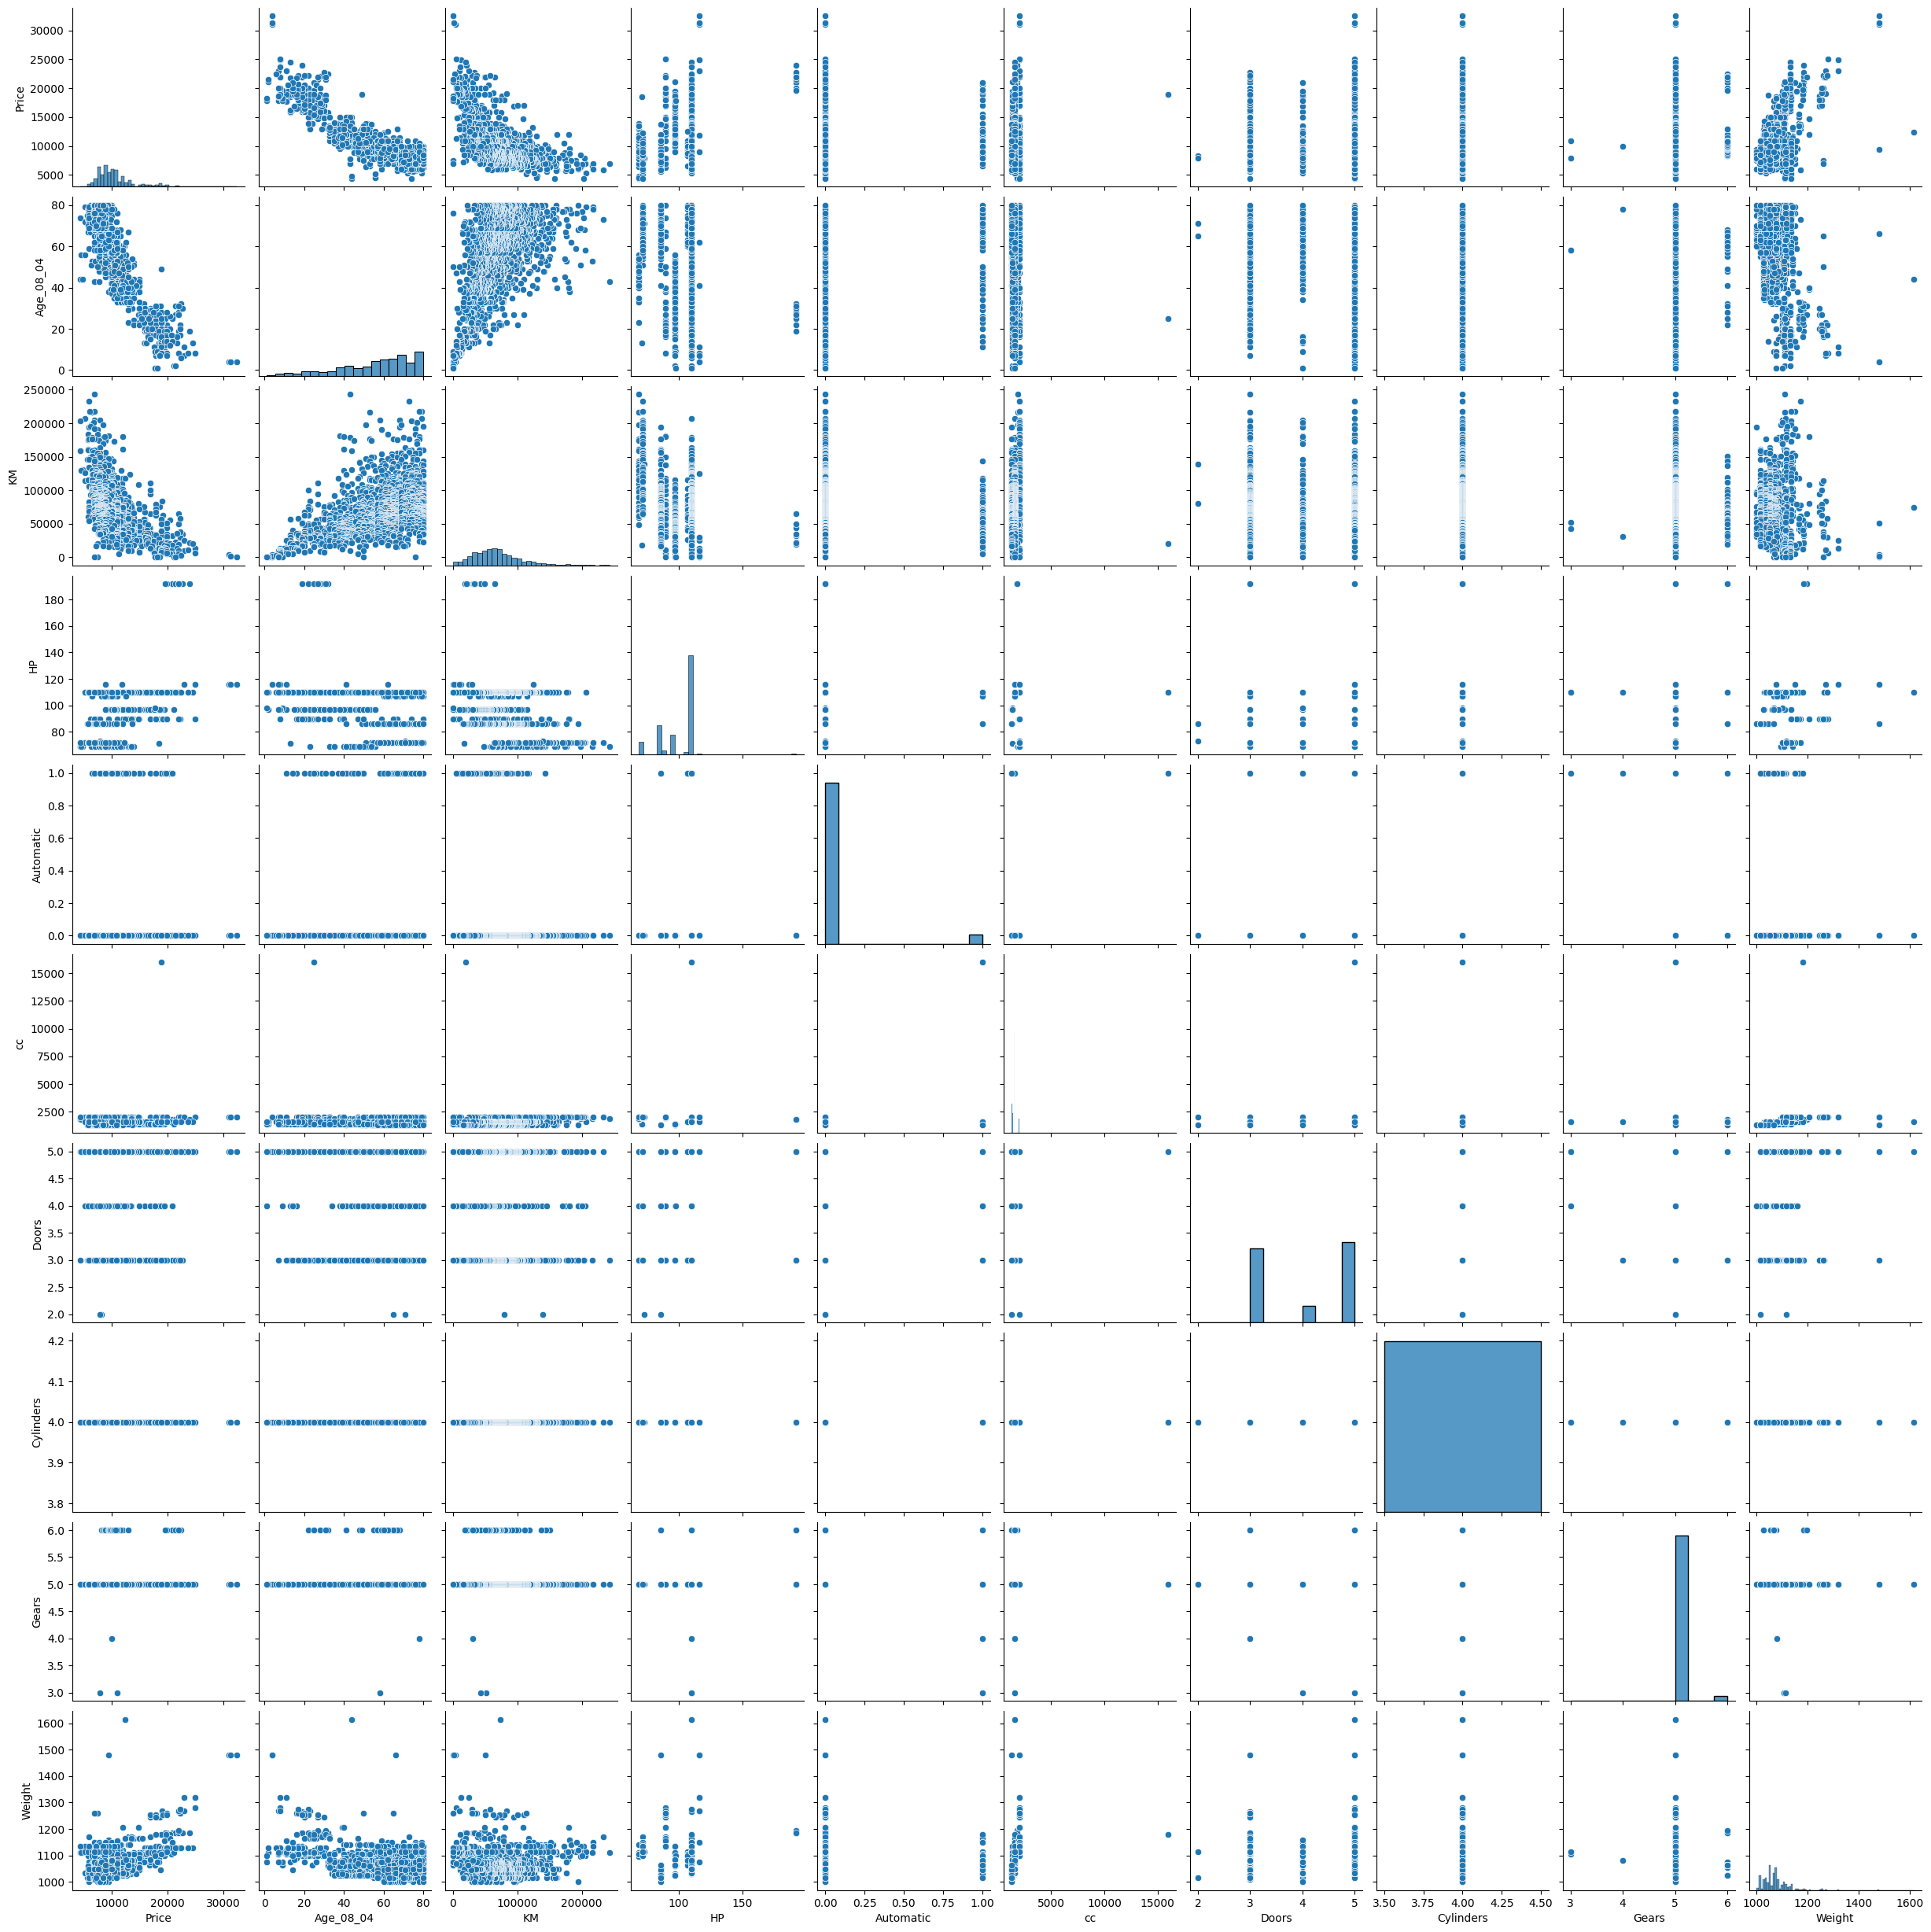

In [8]:
# Pairplot to check relationships between variables
sns.pairplot(df)
plt.show()

In [25]:
# Preprocessing
# Identify categorical and numerical columns
categorical_features = ["Fuel_Type"]  # Updated to 'Fuel_Type'
numerical_features = ["Age_08_04", "KM", "HP", "Automatic", "cc", "Doors", "Weight"]  # Updated column names

In [26]:
# Ensure all features are present in the DataFrame
features = categorical_features + numerical_features
# Correct column names to match those in DataFrame
# Use "Quarterly_Tax" instead of "quarterly_tax"
# features = ['Fuel_Type', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Quarterly_Tax', 'Weight']
features = ['Fuel_Type', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Weight'] # Removed 'Quarterly_Tax'

# Check for the correct column name in your DataFrame
print(df.columns)  # Print the available column names
# Replace "Quarterly_Tax" with the actual column name from the printed list
# if it's different
X = df[features]  # Select only the specified features for X
y = df['Price']

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')


In [19]:
# Train-test split (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# One-hot encoding for categorical variables
# Make sure to use the same feature names in the ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),  # Using updated numerical_features
    ('cat', OneHotEncoder(drop='first'), categorical_features)  # Using updated categorical_features
])

In [28]:
# Model 1: Basic Linear Regression
lr_model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])
lr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age_08_04', 'KM', 'HP',
                                                   'Automatic', 'cc', 'Doors',
                                                   'Weight']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Fuel_Type'])])),
                ('regressor', LinearRegression())])

In [29]:
# Predictions and evaluation
y_pred = lr_model.predict(X_test)
print("Linear Regression Model:")
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

Linear Regression Model:
R2 Score: 0.8332952678447362
MSE: 2224306.040393546


In [31]:
# Model 2: Ridge Regression (L2 Regularization)
ridge_model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', Ridge(alpha=1.0))])
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

print("\nRidge Regression Model:")
print("R2 Score:", r2_score(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))


Ridge Regression Model:
R2 Score: 0.8336891494944663
MSE: 2219050.5607117885


In [32]:
# Model 3: Lasso Regression (L1 Regularization)
lasso_model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', Lasso(alpha=0.1))])
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

print("\nLasso Regression Model:")
print("R2 Score:", r2_score(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))


Lasso Regression Model:
R2 Score: 0.8333288637066383
MSE: 2223857.7779021654


# Multiple Linear Regression

## Steps:

## 1. Exploratory Data Analysis (EDA)
### Load the dataset
### Check for missing values & data types
### Visualize distributions and correlations

## 2. Data Preprocessing (handle categorical variables, missing values, and scaling).
### Handle categorical variables (One-Hot Encoding - FuelType).
### Standardization/Normalization of numerical features (Age, KM, HP, etc.)
### Train-test split (80% training, 20% testing)

## 3. Model Building
### Train a Multiple Linear Regression Model
### Build at least 3 different models with different feature sets
#### Model 1: Basic Multiple Linear Regression.
#### Model 2: Ridge Regression (L2 Regularization).
#### Model 3: Lasso Regression (L1 Regularization).

## 4. Model Evaluation
### Compute R² Score, Mean Absolute Error (MAE), Mean Squared Error (MSE)
### Interpret regression coefficients

## 5. Lasso & Ridge Regression
### Apply Lasso (L1 Regularization) & Ridge (L2 Regularization)
### Compare results

# Interview Questions:

## Normalization vs. Standardization

### Normalization: Scales values between 0 and 1. Used when features have different ranges.
### Standardization: Transforms features to have mean = 0 and standard deviation = 1. Preferred for linear models.

### Multicollinearity in MLR
### Using Variance Inflation Factor (VIF) to detect it.
### Droping highly correlated variables.
### Using Ridge Regression to mitigate it.

# Next Step:

## Analyse the results.
## Adjust hyperparameters (e.g., alpha in Ridge/Lasso)
## Interpret feature importance

# Further Analysis

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [37]:
# Load dataset
df = pd.read_csv('ToyotaCorolla - MLR.csv')

In [38]:
# Display basic information and summary statistics
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000 

In [36]:
# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


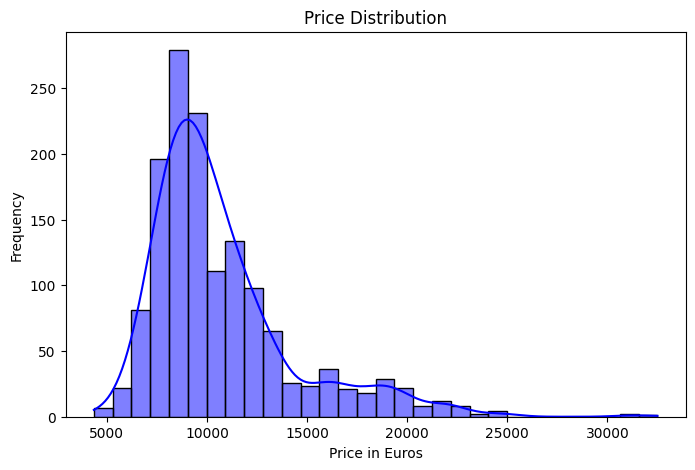

In [39]:
# Visualizing the distribution of Price
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=30, kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price in Euros')
plt.ylabel('Frequency')
plt.show()

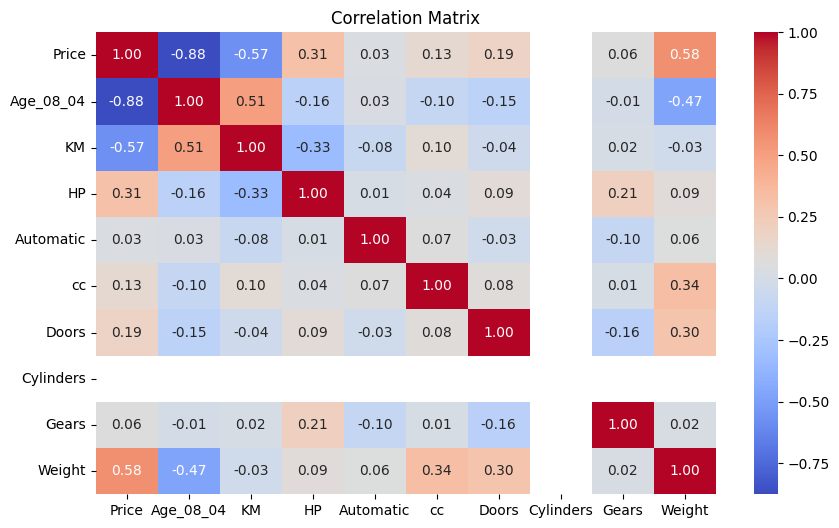

In [41]:
# Visualizing correlation matrix
plt.figure(figsize=(10,6))
# Calculate correlation only for numeric columns
numeric_df = df.select_dtypes(include=np.number) # Select only numeric columns for correlation
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [52]:
# Encoding categorical variables
categorical_features = ['Fuel_Type']  # Changed from 'FuelType'
# 'Quarterly_Tax' is not present in the DataFrame. Remove it.
numerical_features = ['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Weight']  # Changed 'Age' to 'Age_08_04', 'CC' to 'cc'

In [53]:
#  Splitting the dataset
# Remove 'Quarterly_Tax' from the drop list since it's not in the DataFrame
X = df.drop(columns=['Price'])
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Create preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

In [55]:
# Multiple Linear Regression Model
mlr_model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

mlr_model.fit(X_train, y_train)
y_pred = mlr_model.predict(X_test)

In [56]:
# Model Evaluation
print("Linear Regression Model Performance:")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")

Linear Regression Model Performance:
MSE: 2224306.04
R2 Score: 0.83


In [57]:
# Ridge Regression
ridge_model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
print("\nRidge Regression Performance:")
print(f"MSE: {mean_squared_error(y_test, y_pred_ridge):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_ridge):.2f}")



Ridge Regression Performance:
MSE: 2219050.56
R2 Score: 0.83


In [58]:
# Lasso Regression
lasso_model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', Lasso(alpha=0.1))
])
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
print("\nLasso Regression Performance:")
print(f"MSE: {mean_squared_error(y_test, y_pred_lasso):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_lasso):.2f}")



Lasso Regression Performance:
MSE: 2223857.78
R2 Score: 0.83


In [59]:
# Feature Importance Analysis
coefficients = mlr_model.named_steps['regressor'].coef_
feature_names = numerical_features + list(mlr_model.named_steps['preprocess'].named_transformers_['cat'].get_feature_names_out())
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print("\nFeature Importance:")
print(feature_importance)



Feature Importance:
            Feature  Coefficient
8  Fuel_Type_Petrol  1453.694461
6            Weight  1326.190352
2                HP   234.138332
3         Automatic    21.512689
7  Fuel_Type_Diesel     4.202110
4                cc   -14.098311
5             Doors   -80.500836
1                KM  -600.179991
0         Age_08_04 -2267.156303


<ipython-input-60-605c6694f002>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='viridis')


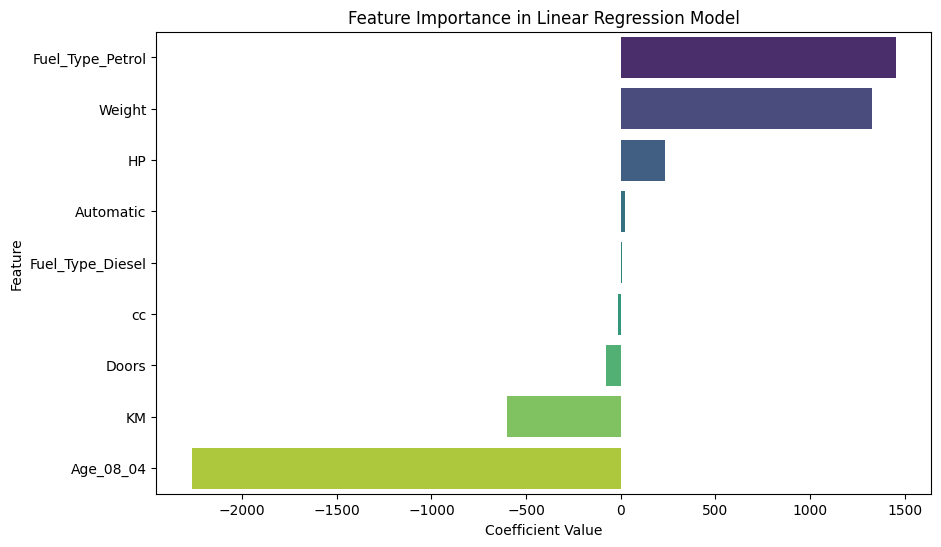

In [60]:
# Display feature importance as a bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance in Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()